# 26 Oct 2023 - Activity: 1-Dimensional Travelling Waves

[Wave equations](https://en.wikipedia.org/wiki/Wave_equation) are common to all branches of physics. In fact, many modern research topics include some investigations that use wave theory. So useful is the concept of a wave, that we adapted it for quantum mechanics in the form of the [Schrodinger Equation](https://en.wikipedia.org/wiki/Schr%C3%B6dinger_equation) and the position representation of the wavefunction ($\psi(x,t)$). While wildly useful and broadly applicable, we need to build up some intuition and use cases for waves. We will start with the 1D wave equation:

$$\dfrac{\partial^2 f(z,t)}{dz^2} = \dfrac{1}{v^2}\dfrac{\partial^2 f(z,t)}{dt^2}$$

As we discussed, any function of the form:

$$f(z,t) = g(z+vt)+h(z-vt)$$

solves the 1D wave equation. One way to think about this what this solution is showing is that some smooth function $g(z)$ and another smooth function $h(z)$ individually solve the wave equation if they just move to the left for $g$ and to the right for $f$. Furthermore because this PDE is linear (containing only linear derivatives of $z$ and $t$, i.e., no squares or functions of them), [superposition](https://en.wikipedia.org/wiki/Superposition_principle) holds. And we can simply add solutions together linearly to get new solutions!

## Travelling Wave Solutions

That is all well and good, but we need a common language. A grammar to understand our solutions. These are basis functions, they are the things we all agree on that describe the "space" of the solutions. You have seen these already in our study of normal modes. Our sinusoidal solutions, the frequencies and amplitudes of the modes themselves, provide a set of basis functions that can describe the general motion of the coupled SHOs. What's nice about that choice is that we can reproduce it because we all agree to solve the same eigenvalue problem.

For the 1D wave equation, these functions are [Travelling Wave Solutions](https://en.wikipedia.org/wiki/Periodic_travelling_wave). The describe the simplest motion of a travelling wave: single frequency oscillation over an infinite domain. There's no end points to worry about, and only one frequency. Also, it just moves to the left or to the right. You can probably see how multiple dimensions result in much more complexity. A basic traveling wave solution is:

$$f(z,t) = A cos(kz-vt+\phi)$$

You can show that this equation satisfies the wave equation. More importantly, does a linear sum do so?

**&#9989; Do this** 

Demonstrate that this proposed general solution:

$$F(z,t) = \sum_i^n A_i\:cos(k_i z - v t + \phi_i)$$

solves the wave equation.


## Looking at Travelling Wave Solutions

Let's investigate several scenarios for travelling wave solutions:

1. A single travelling wave (done for you with different representations)
2. The superposition of two waves (not close frequencies; close amplitudes)
3. The superposition of two waves (close frequencies; close amplitudes)
4. The superposition of two waves (not close frequencies; not close amplitudes)
5. The superposition of two waves (close frequencies; not close amplitudes)
6. The superposition of three waves (make adjustments to test your intuition from two waves)

Make your choices, but also vary them a bit. You can investigate things like widgets (e.g., [sliders](https://matplotlib.org/stable/gallery/widgets/slider_demo.html)) which make this stuff more interactive, but regular plots are totally fine. 

**&#9989; Do this** 

Here is my suggestion and a challenge:

1. Plot your solutions in 2D for a fixed location (e.g., $x=0$) for all time ($f$ vs $t$)
2. Plot your solutions in 2D for a given time (e.g., $t=0$) for all x ($f$ vs $x$)
3. Plot your solutions in 3D using the $x-y$ plane as positions vs time and using $z$ for $f$ (what does this representation buy you? Is it more or less useful than the above two?)
4. Challenge (animate your plots). Matplotlib can use the animation api. [Here's a simple script](https://matplotlib.org/2.0.2/examples/animation/simple_anim.html).



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline



### Single Travelling Wave

Here's the plots for a single travelling wave with $A=1$, $\lambda = 2$, $\omega=2\pi$, and $\phi=0$.

$$f(z,t) = A cos(kz-\omega t+\phi)$$

First we will create the wave. This is a little bit difficult because both $x$ and $t$ can vary, but we've made functions of two dimensions before using ``meshgrid`, so we can just employ that with a little function to complete the wave.

In [2]:
# Parameters
A = 1.0           # Amplitude
lambda_ = 2.0     # Wavelength (underscore needed because lambda is a reserved word)
f = 1.0           # Frequency in Hz
phi = 0.0         # Phase constant in radians

k = 2 * np.pi / lambda_
omega = 2 * np.pi * f

# Define the wave equation
def wave(x, t):
    return A * np.sin(k * x - omega * t + phi)

# Generate x and t values
x = np.linspace(0, 4 * lambda_, 100)
t = np.linspace(0, 2/f, 100)

X, T = np.meshgrid(x, t)  # Create a meshgrid for x and t values
Y = wave(X, T)  # Compute the amplitude for every combination of x and t

#### Plotting amplitide vs location

Every location is waving, so here we look at all location at a single time. And then we plot the amplitude of the wave at that location. We can do this for different times.

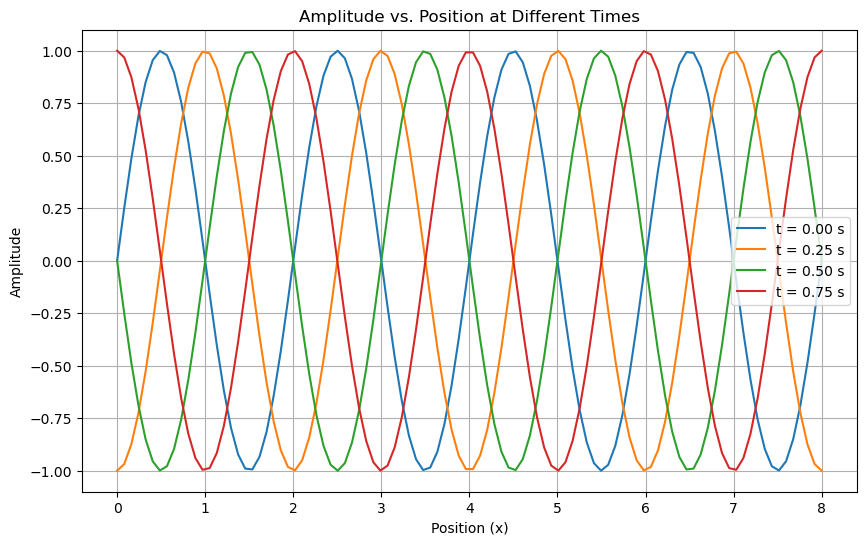

In [3]:
# Plot amplitude vs. position for different times
times_to_plot = [0, 0.25/f, 0.5/f, 0.75/f]  # Chosen specific times to show one complete cycle

plt.figure(figsize=(10, 6))

for plot_time in times_to_plot:
    plt.plot(x, wave(x, plot_time), label=f't = {plot_time:.2f} s')

plt.title("Amplitude vs. Position at Different Times")
plt.xlabel('Position (x)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

#### Plotting amplitude vs. time for different positions

At all times the wave is waving, so we can look at the amplitude of the wave at all times for a single location. We can do this for different locations.

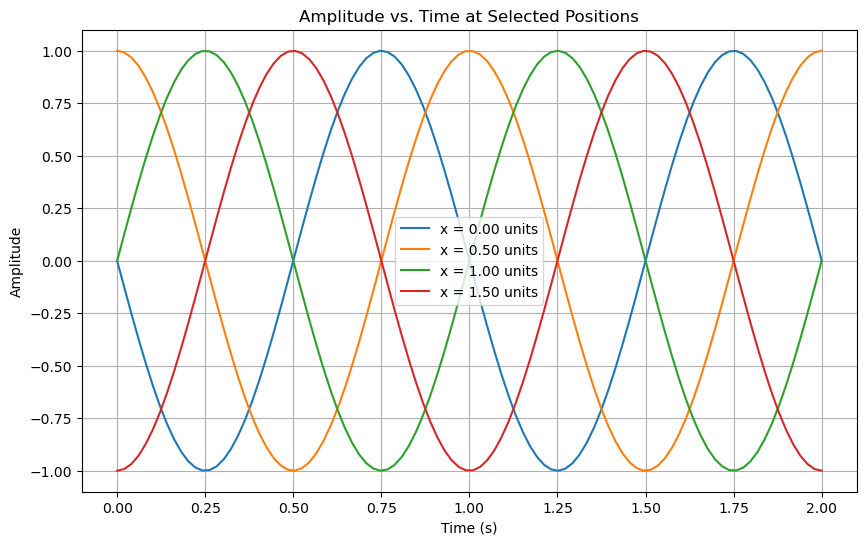

In [4]:
# Selected positions to plot
positions_to_plot = [0, lambda_/4, lambda_/2, 3*lambda_/4]

plt.figure(figsize=(10, 6))

for pos in positions_to_plot:
    plt.plot(t, wave(pos, t), label=f'x = {pos:.2f} units')

plt.title("Amplitude vs. Time at Selected Positions")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### Plotting space and time together

It's a bit hard to see what this 1D wave is doing, so we can instead plot position and time on the plane and let the height represent the amplitude.

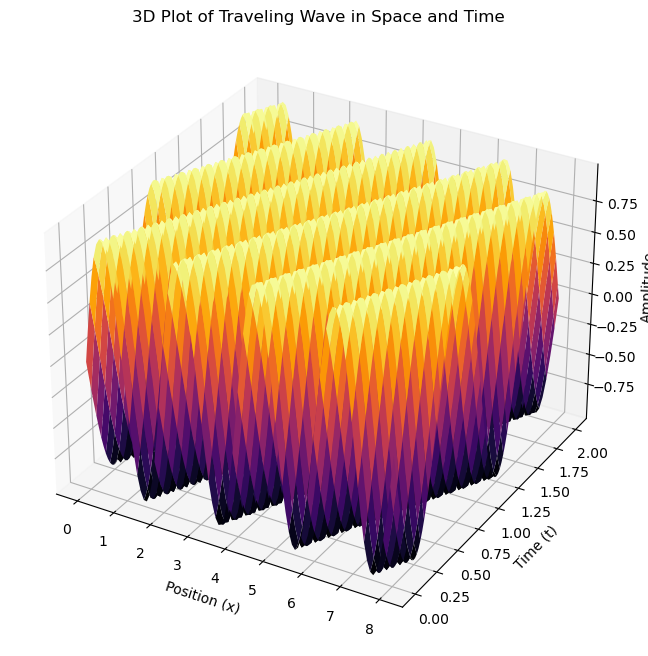

In [5]:
# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, T, Y, cmap='inferno')  # Using viridis colormap for better clarity
ax.set_title("3D Plot of Traveling Wave in Space and Time")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Time (t)")
ax.set_zlabel("Amplitude")
ax.view_init(elev=30, azim=-60)  # Adjust viewing angle for better visualization


#### Ok, but make it 2D.

This isn't the easiest representation to view. You might be able to adjust it a bit with changing the viewing angle. But, we can flatten this plot into a heat map. This is the more common way of viewing these kind of data.

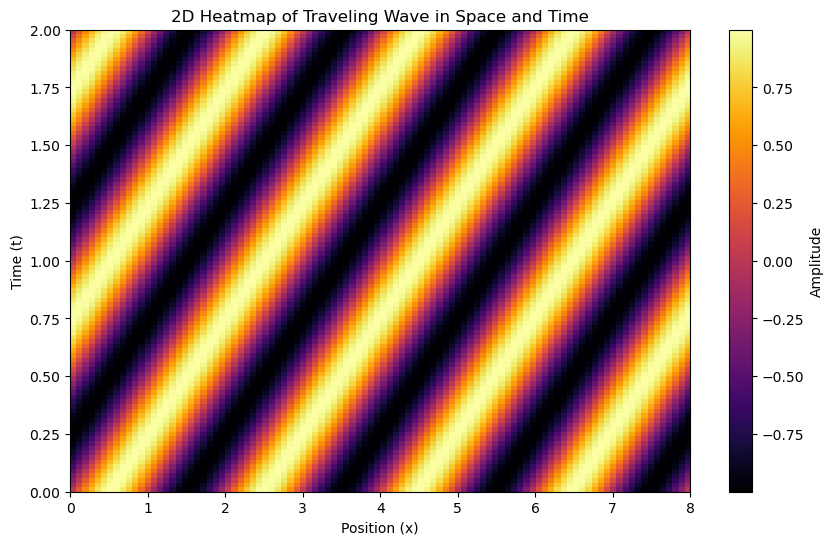

In [6]:
plt.figure(figsize=(10, 6))
plt.imshow(Y, aspect='auto', origin='lower', extent=[x.min(), x.max(), t.min(), t.max()], cmap='inferno')
plt.colorbar(label="Amplitude")
plt.title("2D Heatmap of Traveling Wave in Space and Time")
plt.xlabel("Position (x)")
plt.ylabel("Time (t)")

plt.show()


#### But I really want to animate it

Sure. Here's that code.

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, wave(x, 0))  # Initial plot (t=0)
ax.set_ylim([-A, A])  # Setting the y limits to the amplitude range
ax.set_xlabel('Position (x)')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.set_title("Amplitude vs. Position over Time")

def update(frame):
    line.set_ydata(wave(x, frame))  # Update the y data of the line plot for the current time frame
    ax.set_title(f"Amplitude vs. Position at t = {frame:.2f} s")
    return line,

# Animate over the given times using FuncAnimation
ani = FuncAnimation(fig, update, frames=t, blit=True, interval=50)
plt.close(fig) ## needed to stop another static image from being displayed

# Display the animation in the notebook
HTML(ani.to_jshtml())


In [8]:
## your code here

## REMEMBER THAT YOU ARE WORKING ON SUPERPOSITION OF WAVES

## Another Wave Equation: the Schroedinger Equation

The wave equation above is a canonical 1D wave equation. It can be applied in many places, but the interpretation of the function $f$ varies from model to model. It can be height, displacement, voltage, current, density, number, temperature, etc and so on.

But one of the most important "wave" equations is the Schroedinger equation.

$i\hbar|\psi(t)\rangle = H(t)|\psi(t)\rangle$

where $H(t)$ is the Hamiltonian operator, a representation of the energetics of the system, and $\psi(t)$ is the state of the quantum mechanical system. I put "wave" in quotes, because this equation typically contains only a single derivative with respect to time unlike the classical wave equation above. However, it is still a linear partial differential equation, and thus superposition continues to be a useful tool. In QM, superposition has deep implications for the nature of particle identity and statistical uncertainty. 

**We do not solve this problem in general.** The solutions to this wave equation require knowledge of $V(x)$. Let's look at a particular case of the infinite 1D well. We need some mathematical tools and approaches to make sense of it. It also needs to have a context because typically $H(t)$ should be known.

Our to this problem is solve for "steady state" solutions, those that do not depend on time. For many quantum systems, the time evolution of these stationary states turns out to be quite simple. Typically it involves multiplying the stationary state by a time evolving phase that is proportional to the energy of the state ($e^{iE_nt/\hbar}$).



### The 1D Infinite Square Well

There's a lot that goes into describing how we get from the general Schroedinger equation to the one below. Books start from this differential equation below calling it the "Schroedinger equation", but it is really the position representation of the energy eigenvalue problem. Which is a mouthful. But basically this only solves for stationary states, and will give us the energy of those states. Anything more general has to be built from these eigenstates.

Because we have indicated we are interested in steady state solutions, those tend to be energy eigenstates of the system. That is, the solutions to the steady state problems ae the basis functions for general states! With this, our work becomes solving the following 1D differential equation:

$$\dfrac{\hbar^2}{2m}\dfrac{\partial^2 \phi_E(x)}{\partial x^2} + V(x)\phi_E(x) = E\phi_E(x)$$

where $\phi_E(x)$ represents the position representation of a given energy eigenstate. This is not the Schroedinger equation, but rather an instance of it's use in this problem where we seek stationary soltuions. Notice there is a new linear potential term in the equation $V(x)$. 

A 1D infiite well has a potential $V(x)=0$ over a range and is otherwise zero.

$$V(x) = 0\;\mathrm{from}\; 0<x<a \; \mathrm{and}\:\infty\:\mathrm{otherwise}$$

Thus inside the box we have:

$$\dfrac{\hbar^2}{2m}\dfrac{\partial^2 \phi_E(x)}{\partial x^2} = E\phi_E(x)$$

And outside the box, $\phi_E(x)$ must vanish because $V(x)=\infty$ there.

Let's solve for $\phi_E(x)$ and $E$ and see what this "wave" equation indicates.

$$\dfrac{\partial^2 \phi_E(x)}{\partial x^2} = -\dfrac{2mE}{\hbar^2}\phi_E(x)$$

This is a second order differential equation, and we can solve it using the [characteristic equation](https://en.wikipedia.org/wiki/Characteristic_equation_(calculus)):

$$r^2 + \dfrac{2mE}{\hbar^2} = 0$$

which has solutions:

$$r = \pm i\sqrt{\dfrac{2mE}{\hbar^2}}$$


Thus the general solution is:

$$\phi_E(x) = A e^{i\sqrt{\dfrac{2mE}{\hbar^2}}x} + B e^{-i\sqrt{\dfrac{2mE}{\hbar^2}}x}$$

We can simplify this by using the [Euler identity](https://en.wikipedia.org/wiki/Euler%27s_identity):

$$e^{i\theta} = cos(\theta) + i\:sin(\theta)$$

and

$$e^{-i\theta} = cos(\theta) - i\:sin(\theta)$$

to get:

$$\phi_E(x) = A cos(\sqrt{\dfrac{2mE}{\hbar^2}}x) + B sin(\sqrt{\dfrac{2mE}{\hbar^2}}x)$$

We can use the boundary conditions to solve for $A$ and $B$. First, we know that $\phi_E(x)$ must vanish outside the box, so $A=0$. Second, we know that $\phi_E(x)$ must vanish at the edges of the box, so $sin(\sqrt{\dfrac{2mE}{\hbar^2}}a)=0$. This means that:

$$\sqrt{\dfrac{2mE}{\hbar^2}}a = n\pi$$

where $n$ is an integer. This means that:

$$E_n = \dfrac{n^2\pi^2\hbar^2}{2ma^2}$$

and

$$\phi_E(x) = B_n sin(\sqrt{\dfrac{2mE}{\hbar^2}}x)$$

where $B_n$ is a normalization constant.




## Implications of Superposition: Diffraction

One of the key indicators of wave like behavior is [diffraction](https://en.wikipedia.org/wiki/Diffraction). Diffraction is the bending of waves around obstacles and it is a consequence of superposition. 

In the case of [single-slit diffraction](https://en.wikipedia.org/wiki/Diffraction#Single-slit_diffraction), the wave is diffracted around a slit of width $a$. a forms circular wave fronts that interfere with each other.

![Diagram of single slit diffraction](../assets/images/Single_slit_diffraction.jpeg)

A screen placed a distance $L$ away from the slit will show a diffraction pattern. We can show the intensity of the diffraction pattern is:

$$I(\theta) = I_0\left(\dfrac{\sin(\beta)}{\beta}\right)^2$$

where

$$\beta = \dfrac{\pi a \sin(\theta)}{\lambda}$$

and $\lambda$ is the wavelength of the wave and $\theta$ is the angle of the diffracted wave from the center of the slit ($\tan(\theta) = y/L$ where $y$ is the location along the screen).

**&#9989; Do this**

1. Plot the intensity of the diffraction pattern for a single slit of width $a=1$ mm and wavelength $\lambda=500$ nm.
2. Find the slit width needed to form a diffraction pattern for a typical water wave. You will need to make some estimates.
3. For atomic spacing ($10^{-10}$ m), use your plotting tool to estimate the wavelength needed to form a diffraction pattern. You will need to make some estimates.

In [9]:
## your code here